<a href="https://colab.research.google.com/github/Ann0622/linguistic/blob/main/0530nltk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
nltk.download('popular')
nltk.download('all-corpora')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
import nltk
from nltk.corpus import PlaintextCorpusReader

corpus_root = '/content/drive/MyDrive/colab'
wordlists = PlaintextCorpusReader(corpus_root, '.*')

books = wordlists.fileids()
print(books)

['2011pos Older people are happier.txt', "2012neg What doctors don't know about the drugs they prescribe.txt", '2016neu Asking for help is a strength, not a weakness.txt']


In [ ]:
import nltk
testText = wordlists.words('2011pos Older people are happier.txt')
single = nltk.text.Text(testText)
print(single)

<Text: People are living longer and societies are getting...>


In [ ]:
import nltk
from nltk.corpus import PlaintextCorpusReader

corpus_root = '/content/drive/MyDrive/group'
wordlists = PlaintextCorpusReader(corpus_root, '.*')

books = wordlists.fileids()
print(books)

['Argument Essay outline _ first draft _ We should wash our clothes less often.txt', 'Argument First Draft.txt', 'Argument final drat_Wallace_511061133_20240520.txt']


In [ ]:
import nltk
testText = wordlists.words('Argument First Draft.txt')
single = nltk.text.Text(testText)
print(single)

<Text: Cheng Ruby CHENG Shelly Hsiao Composition II Argument...>


In [ ]:
# prompt:

# Create a frequency distribution of the words in the second text
fdist = nltk.FreqDist(single)

# Print the most frequent words
print(fdist.most_common(10))


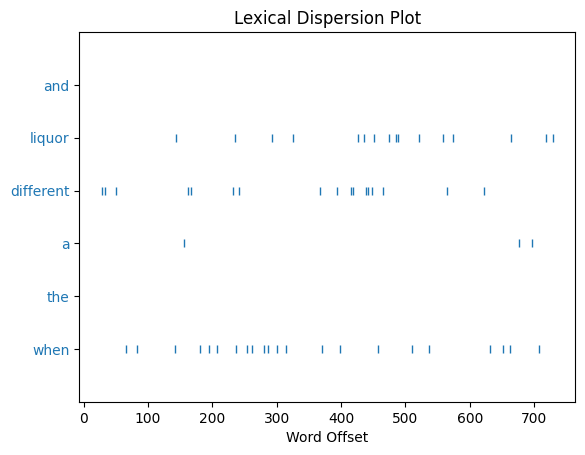

In [ ]:
import nltk
testText = wordlists.words('Argument First Draft.txt')
single = nltk.text.Text(testText)

findList = ["when","the","a","different","liquor","and"]
single.dispersion_plot(findList)

In [ ]:
books = wordlists.fileids()

cfd = nltk.ConditionalFreqDist((fileid, word)
    for fileid in books
    for word in wordlists.words(fileid)
    )

findList = ['can', 'could', 'may', 'might', 'must', 'will', 'shall', 'should','and']
cfd.tabulate(conditions=books, samples=findList)

                            can  could    may  might   must   will  shall should    and 
Argument First Draft.txt      1      1      0      0      0      0      0      0     22 


In [ ]:
import nltk
from nltk.corpus import PlaintextCorpusReader
import re

# Set the root directory where the text files are located
corpus_root = '/content/drive/MyDrive/group'

# Read the text files from the specified directory
wordlists = PlaintextCorpusReader(corpus_root, '.*')

# List of all files in the directory
books = wordlists.fileids()
print("Books in corpus:", books)

# Initialize counters for however and ; however
however_count = 0
semicolon_however_count = 0

# Process each book
for book in books:
    # Read the content of the book
    text = wordlists.raw(book)

    # Convert the text to lowercase
    text_lower = text.lower()

    # Count occurrences of "however"
    however_count += len(re.findall(r'\bhowever\b', text_lower))

    # Count occurrences of "; however"
    semicolon_however_count += len(re.findall(r';\s*however\b', text_lower))

# Print the results
print(f"Total 'however' count: {however_count}")
print(f"Total '; however' count: {semicolon_however_count}")

# Check if usage is correct
if however_count == semicolon_however_count:
    print("The usage of 'however' is correct.")
else:
    print("The usage of 'however' is incorrect.")


Books in corpus: ['Argument First Draft.txt']
Total 'however' count: 2
Total '; however' count: 0
The usage of 'however' is incorrect.


In [ ]:
books = wordlists.fileids()
print(books)

['Argument Essay outline _ first draft _ We should wash our clothes less often.txt', 'Argument First Draft.txt', 'Argument final drat_Wallace_511061133_20240520.txt']


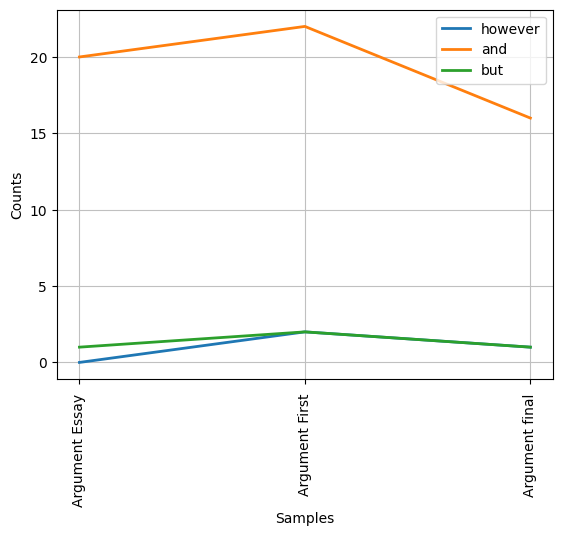

In [ ]:
import os
import nltk
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
import matplotlib.pyplot as plt

# Define the root directory for your corpus
corpus_root = '/content/drive/MyDrive/group'
file_pattern = '.*'  # Pattern to match all files

# List to store the cleaned texts
texts = []

# Read each file manually with the correct encoding
for filename in os.listdir(corpus_root):
    file_path = os.path.join(corpus_root, filename)
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
    except UnicodeDecodeError:
        # If utf-8 decoding fails, try a different encoding
        with open(file_path, 'r', encoding='ISO-8859-1') as file:
            text = file.read()
    texts.append((filename, text))

# Now process the texts with NLTK
target_words = ['however', 'and', 'but']

# Create Conditional Frequency Distribution
cfd = nltk.ConditionalFreqDist(
    (target, filename[:15])  # [:7] to take the first seven characters of the file ID
    for filename, text in texts  # Iterate through each text
    for w in nltk.word_tokenize(text)  # Tokenize the text into words
    for target in target_words  # Check against target words
    if w.lower() == target  # Ensure the word matches the target
)

# Plot the Conditional Frequency Distribution
cfd.plot()
plt.show()


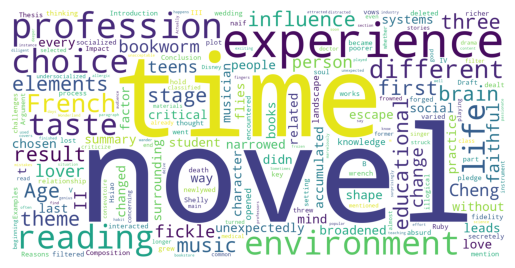

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

file_text = open('/content/drive/MyDrive/group/Argument First Draft.txt').read()

temp = WordCloud(
    background_color="white",
    width=2000,
    height=1000,
    margin= 10,
).generate(file_text)

plt.imshow(temp)
plt.axis("off")
plt.show()

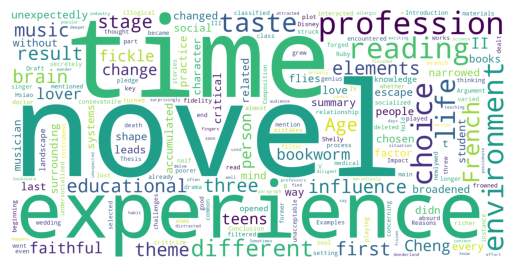

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

f = open('/content/drive/MyDrive/group/Argument First Draft.txt').read()

stop = ["time", "reading", "novel"] + list(STOPWORDS)

wordcloud = WordCloud(
    background_color="white",
    width=2000,
    height=1000,
    margin= 10,
).generate(f)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()